#### Задание 1. Bias-Variance decomposition.

Как известно, ошибка алгоритма может быть разложена по формуле bias-variance decomposition на

$$error^2 = bias^2 + variance$$,

где $bias^2$ -- среднеквадратичное отклонение средних ответов алгоритма от истинных ответов, а variance -- среднее отклонение ответов алгоритма от среднего ответа. 

Предлагается оценить bias и variance с помощью бустрапной оценки.

В цикле обучим N моделей, где на шаге i:

1) Выберем n элементов из выборки по схеме выбора с возвращением (функция np.random.choice()). Обучим на ней модель и получим вектор предсказаний $\hat{y}_i$.

2) Вычислим среднее предсказание $\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$

3) Посчитаем среднюю ошибку алгоритма $error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$

4) Посчитаем смещение: $bias^2 = MSE(y, \overline y)$

5) Посчитаем разброс: $variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$


В качестве алгоритма будем использовать решающее дерево. Данные хранятся в файле $\textbf{blogData_train.csv}$

Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv('blogData_train.csv', header=-1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [4]:
# Разбейте выборку на train и test в соотношении 4:1

data_train, data_test = train_test_split(data, test_size=0.2)

In [5]:
X_train = data_train.values[:, :-1]
X_test = data_test.values[:, :-1]

y_train = data_train.values[:, -1]
y_test = data_test.values[:, -1]

In [6]:
# Функция подсчета среднего предсказания

def get_mean_prediction(list_of_predictions):
    return np.mean(list_of_predictions, axis=0)

In [7]:
# Напишите функции, которые по вектору ответов и набору из N предсказаний выдают среднюю ошибку,
# bias и variance

def error(y_true, list_of_predictions):
    # ВАШ КОД ЗДЕСЬ
    N = len(list_of_predictions)
    error = np.mean([mean_squared_error(y_true, prediction) for prediction in predictions])
    return error

def bias(y_true, list_of_predictions):
    # ВАШ КОД ЗДЕСЬ
    mean_prediction = get_mean_prediction(list_of_predictions)
    bias = mean_squared_error(y_true, mean_prediction)
    return bias

def variance(y_true, list_of_predictions):
    # ВАШ КОД ЗДЕСЬ
    mean_prediction = get_mean_prediction(list_of_predictions)
    variance = np.mean([mean_squared_error(mean_prediction, prediction) for prediction in predictions])
    return variance

In [10]:
# Эксперимент

N = 10
DEPTHS = np.arange(1, 16)

n_objects = X_train.shape[0]

errors = []
biases = []
variances = []

for depth in tqdm(DEPTHS):
    predictions = []
    for i in range(N):
        
        # Сгенерируем выборку для обучения
    
        indices = np.random.choice(n_objects, size=n_objects)
        X = X_train[indices]
        y = y_train[indices]
    
        # Обучите решающее дерево с глубиной depth на выборке X, y
    
        model = DecisionTreeRegressor(max_depth=depth)
        # ВАШ КОД
        model.fit(X, y)
    
        predictions.append(model.predict(X_test))
    
    errors.append(error(y_test, predictions))
    biases.append(bias(y_test, predictions))
    variances.append(variance(y_test, predictions))


100%|██████████| 15/15 [04:49<00:00, 26.91s/it]

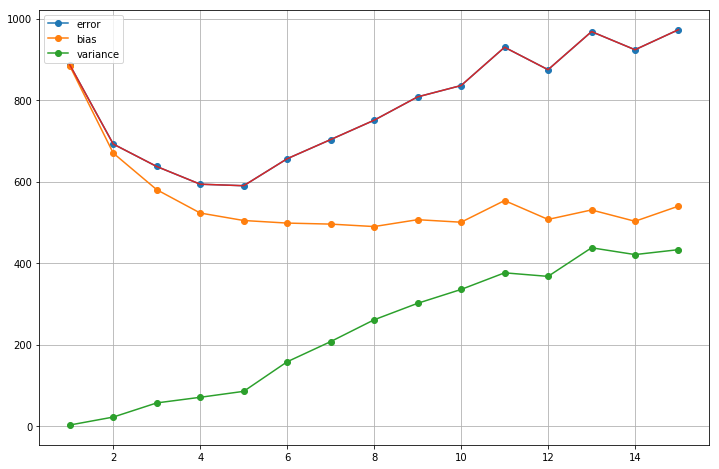

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(DEPTHS, errors, '-o', label='error')
plt.plot(DEPTHS, biases, '-o', label='bias')
plt.plot(DEPTHS, variances, '-o', label='variance')
plt.plot(DEPTHS, np.array(biases) + np.array(variances))
plt.grid()
plt.legend()
plt.plot()
plt.show()

Постройте графики для ошибки, смещения и разброса. Выполняется ли bias-variance разложение?

#### Задание 2

Воспользуйтесь для решения задачи классификации в предыдущей задаче алгоритм RandomForest. 
Постройте график зависимости качества (MSE) от числа деревьев.

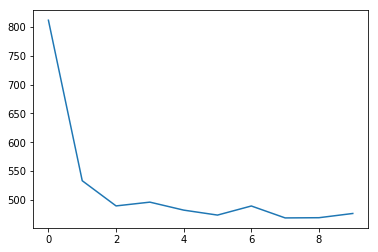

In [17]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm_notebook
# ВАШ КОД ЗДЕСЬ
grid = np.arange(1, 100, 10)

mse = []

for n in tqdm_notebook(grid):
    model = RandomForestRegressor(n_estimators=n, n_jobs=-1)
    model.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    
plt.plot(mse)
plt.show()

In [20]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True)
model.fit(X, y)
model.oob_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.7572618899013295

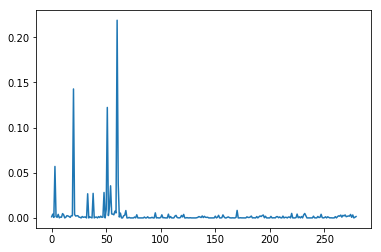

In [29]:
graphviz

plt.plot(model.feature_importances_)

#### Задание 3

Вернемся к задаче предсказания зарплаты. 

В этом задании мы протестируем Blending - метод построения композиции.

Для этого напишите класс Blender, который будет принимать на вход два алгоритма и параметр $\alpha$ -- вес первого алгоритма в итоговом предсказании.

Обучение такой модели состоит в обучении двух исходных моделей, а применение в сумме $y_1 \alpha + y_2 (1 - \alpha)$

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [23]:
class Blender(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha):
        # ВАШ КОД ЗДЕСЬ
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
        
    def fit(self, X, y):
        # ВАШ КОД ЗДЕСЬ
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        
    def predict(self, X):
        # ВАШ КОД ЗДЕСЬ
        y1 = self.clf1.predict(X)
        y2 = self.clf2.predict(X)
        return self.alpha * y1 + (1 - self.alpha) * y2
        
    def predict_proba(self, X):
        # ВАШ КОД ЗДЕСЬ
        y1 = self.clf1.predict_proba(X)
        y2 = self.clf2.predict_proba(X)
        return self.alpha * y1 + (1 - self.alpha) * y2    

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',)
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns
df = df.dropna()

In [25]:
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


In [26]:
X = np.array(df_prc[df._get_numeric_data().columns])
y = np.array(df_prc['salary'], dtype='int')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
score = []
for alpha in np.linspace(0, 1, 10):
    blender = Blender(DecisionTreeClassifier(), GaussianNB(), alpha)
    blender.fit(X_train, y_train)
    prediction = blender.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(y_test, prediction))

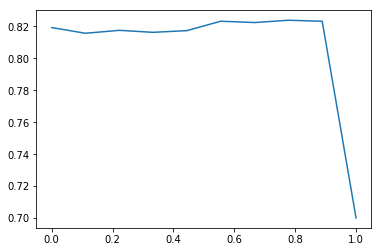

In [53]:
plt.plot(np.linspace(0, 1, 10), score)

In [ ]:
0, 10, 0.1

In [54]:
np.logspace(-2, 3, 5)

array([1.00000000e-02, 1.77827941e-01, 3.16227766e+00, 5.62341325e+01,
       1.00000000e+03])

ibrbulat@yandex.ru